In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy
df_data = pd.read_csv("F0002CH1.CSV")
df_data.head()


,Record Length,2.500000e+03,Unnamed: 2,-0.125000000000,2.68000,Unnamed: 5
0,Sample Interval,1.000000e-04,NaN,-0.1249,2.72,NaN
1,Trigger Point,1.250000000000e+03,NaN,-0.1248,2.72,NaN
2,NaN,NaN,NaN,-0.1247,2.68,NaN
3,NaN,NaN,NaN,-0.1246,2.68,NaN
4,NaN,NaN,NaN,-0.1245,2.68,NaN


In [2]:
df_data.shape

(2499, 6)

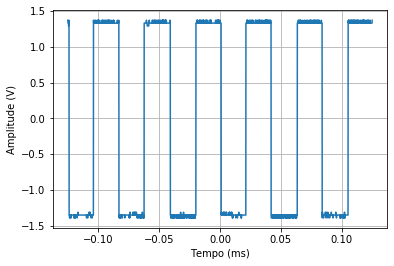

In [3]:
time = df_data.iloc[:,3].to_numpy()      #getting only the fourth column (time)
amplitude = df_data.iloc[:,4].to_numpy() - 1.35  #getting only the fifth column (amplitude)
    

plt.plot(time,amplitude)
plt.ylabel('Amplitude (V)')
plt.xlabel ('Tempo (ms)')
plt.grid('on')

(0, 3)

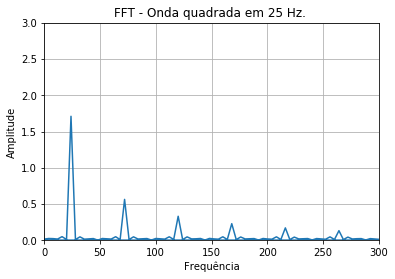

In [23]:
N = len(time) # signal length
ts = time[2]-time[1] #period sampling
fs = 1/ts

t = np.linspace(0, N*ts, N)
transf = scipy.fftpack.fft(amplitude) 

freqs = fftpack.fftfreq(len(amplitude)) * fs #return the frequencies associated to the coefficients


fig, ax = plt.subplots()

ax.plot(freqs, 2/N * np.absolute(transf))
plt.title("FFT - Onda quadrada em 25 Hz. ")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.grid('on')
ax.set_xlim(0, 300)
ax.set_ylim(0, 3)